In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *
import pandas as pd

from IPython.display import display, Markdown

In [6]:
bn = gum.loadBN("instances/bn-40n-40a-1.bif")
bn

(pyagrum.BayesNet@0x12f94be00) BN{nodes: 40, arcs: 40, domainSize: 10^18.6924, dim: 537, mem: 6Ko 304o}

In [7]:
from tqdm import tqdm
for i in tqdm(range(10)):
    gum.generateSample(bn, 1_000_000, f"data/bn-40n-40a-1-test{i+1}.csv")

100%|███████████████████████████████████████████| 10/10 [01:08<00:00,  6.89s/it]


CPU times: user 3min 14s, sys: 5.61 s, total: 3min 20s
Wall time: 28.8 s
CPU times: user 1min 15s, sys: 2.49 s, total: 1min 18s
Wall time: 14.2 s


## Results of the data/bn-40n-40a-1-test10.csv

### Markov equivalence class (PAG)

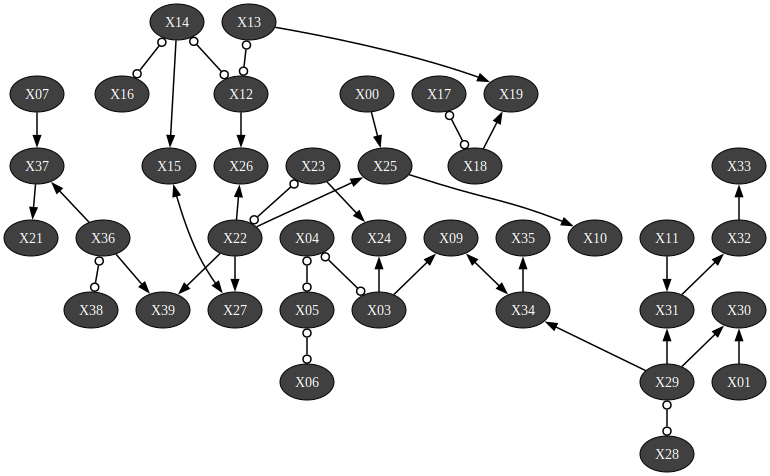

### Causal differences

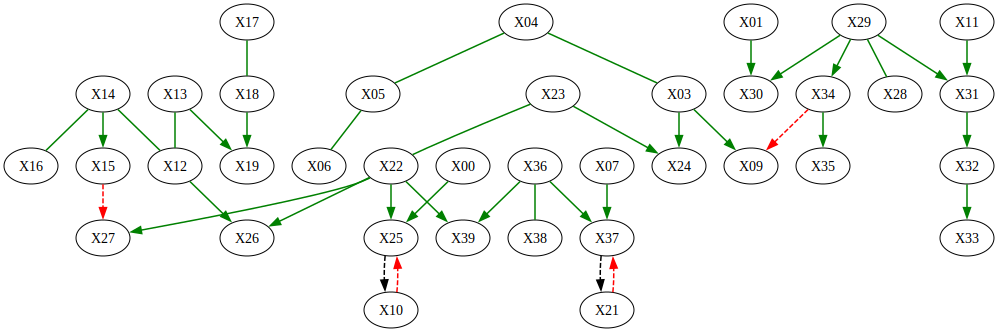

CPU times: user 3min 10s, sys: 5.43 s, total: 3min 15s
Wall time: 28.2 s
CPU times: user 3min 5s, sys: 6.91 s, total: 3min 12s
Wall time: 29.1 s


## Results of the data/bn-40n-40a-1-test2.csv

### Markov equivalence class (PAG)

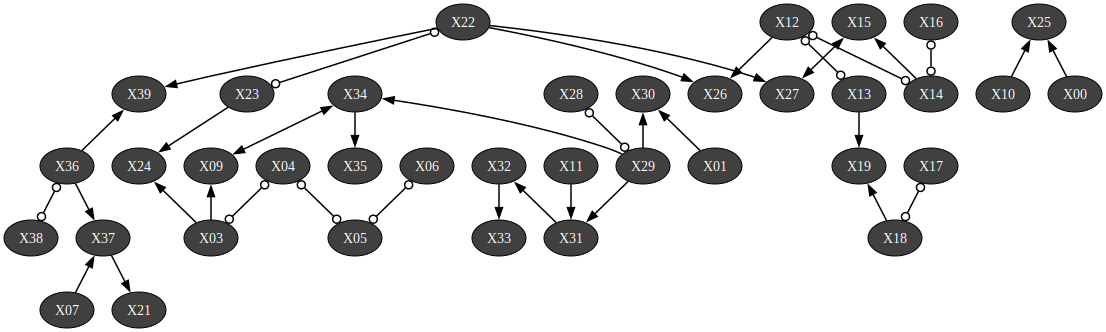

### Causal differences

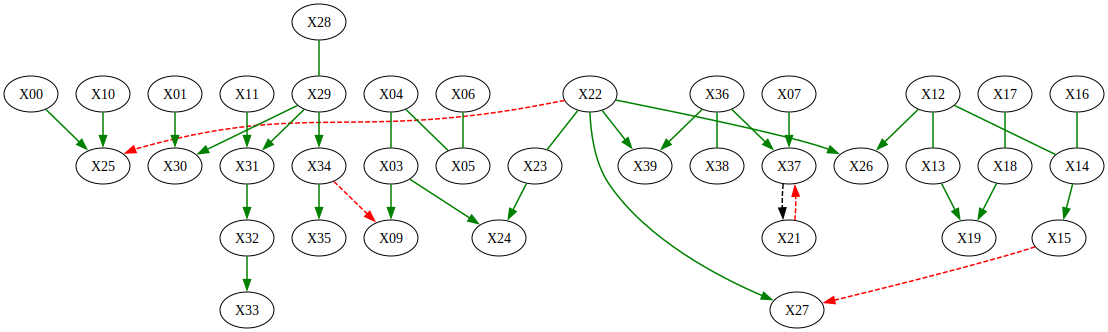

CPU times: user 3min 23s, sys: 5.85 s, total: 3min 29s
Wall time: 32.2 s
CPU times: user 1min 10s, sys: 2.12 s, total: 1min 12s
Wall time: 10.8 s


## Results of the data/bn-40n-40a-1-test3.csv

### Markov equivalence class (PAG)

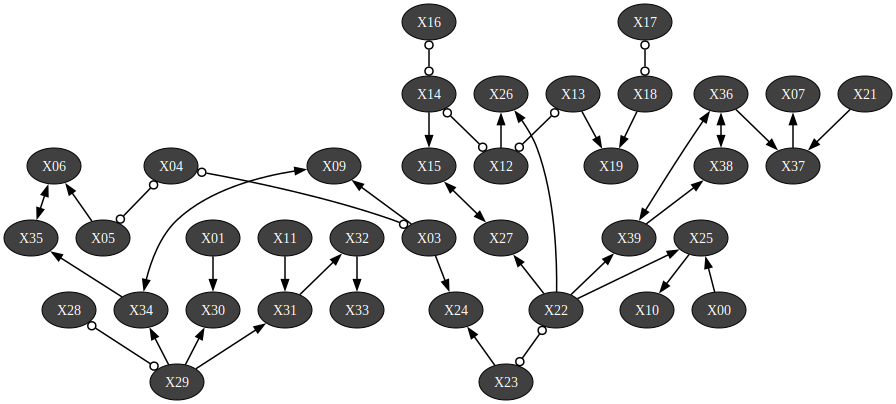

### Causal differences

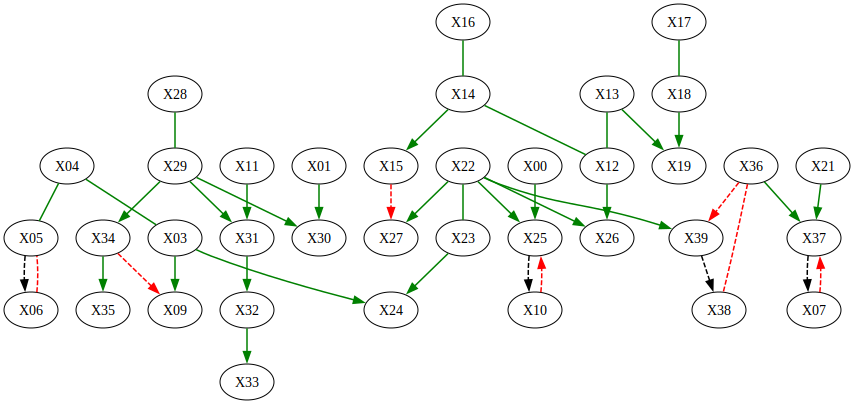

CPU times: user 3min 16s, sys: 5.67 s, total: 3min 22s
Wall time: 30.9 s
CPU times: user 4min 48s, sys: 11.8 s, total: 5min
Wall time: 49.7 s


## Results of the data/bn-40n-40a-1-test1.csv

### Markov equivalence class (PAG)

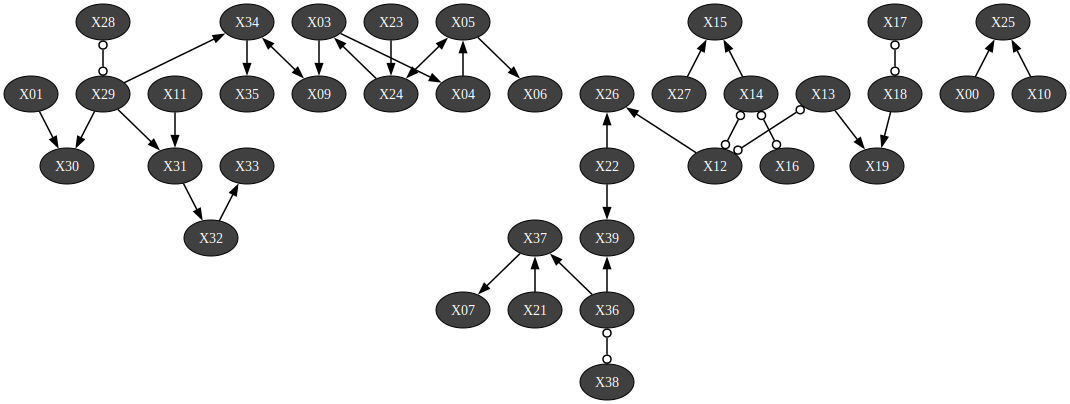

### Causal differences

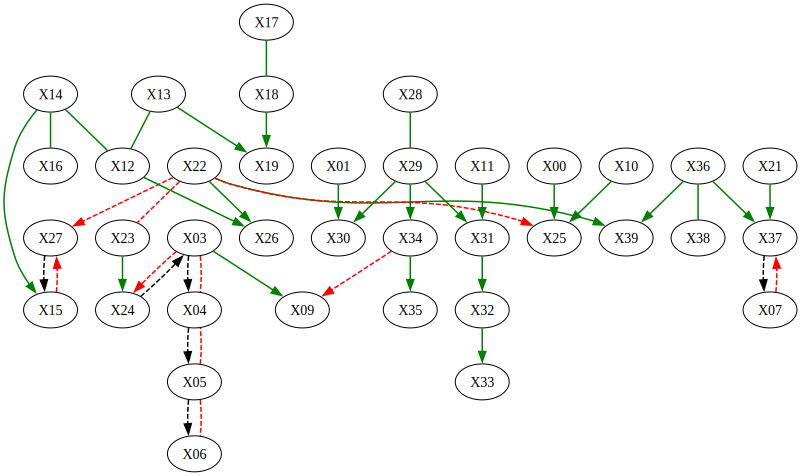

CPU times: user 3min 21s, sys: 5.35 s, total: 3min 26s
Wall time: 29.9 s
CPU times: user 4min 46s, sys: 17.8 s, total: 5min 3s
Wall time: 56.4 s


## Results of the data/bn-40n-40a-1-test4.csv

### Markov equivalence class (PAG)

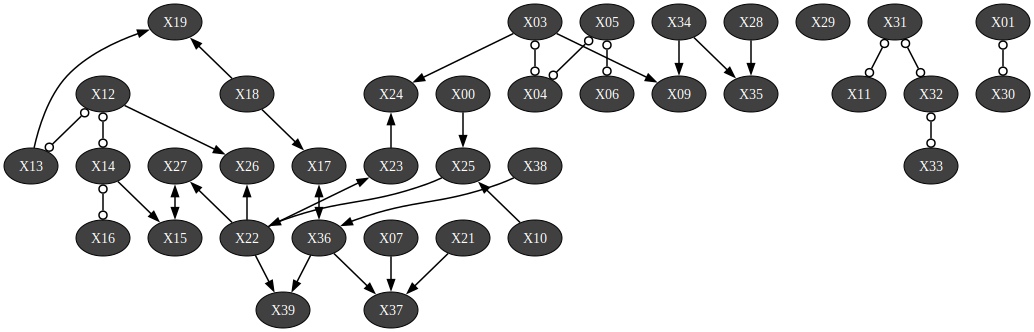

### Causal differences

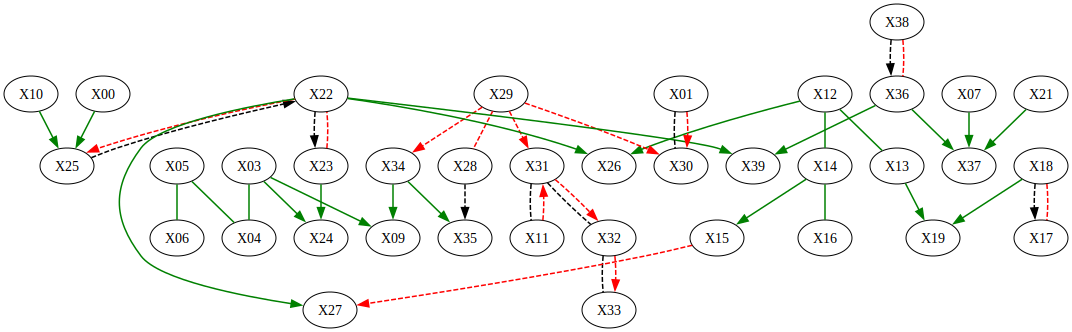

CPU times: user 3min 33s, sys: 5.85 s, total: 3min 39s
Wall time: 33.8 s
CPU times: user 49.7 s, sys: 1.28 s, total: 51 s
Wall time: 7.48 s


## Results of the data/bn-40n-40a-1-test5.csv

### Markov equivalence class (PAG)

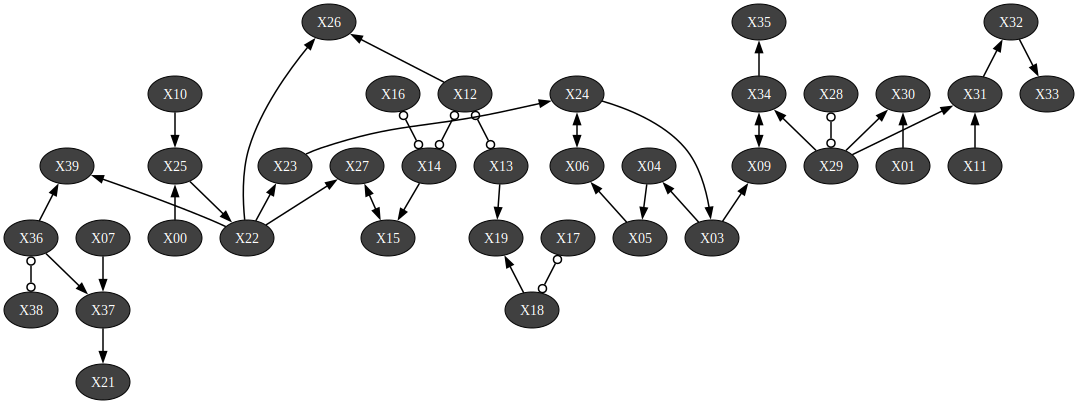

### Causal differences

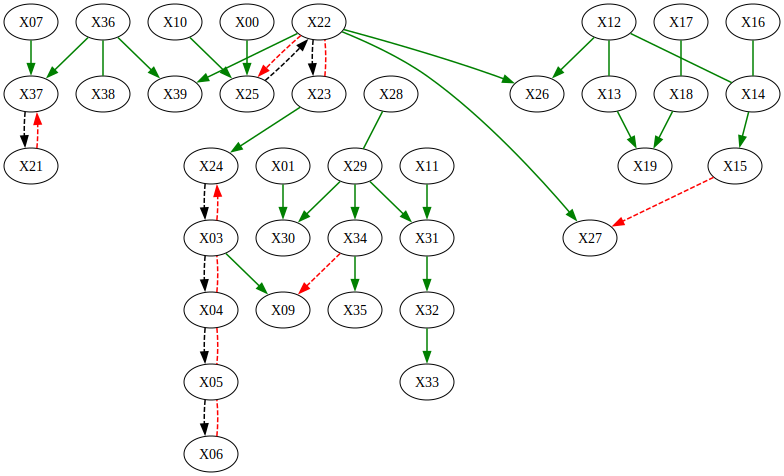

CPU times: user 3min 28s, sys: 5.93 s, total: 3min 34s
Wall time: 32.4 s
CPU times: user 2min 57s, sys: 6.85 s, total: 3min 3s
Wall time: 28.5 s


## Results of the data/bn-40n-40a-1-test7.csv

### Markov equivalence class (PAG)

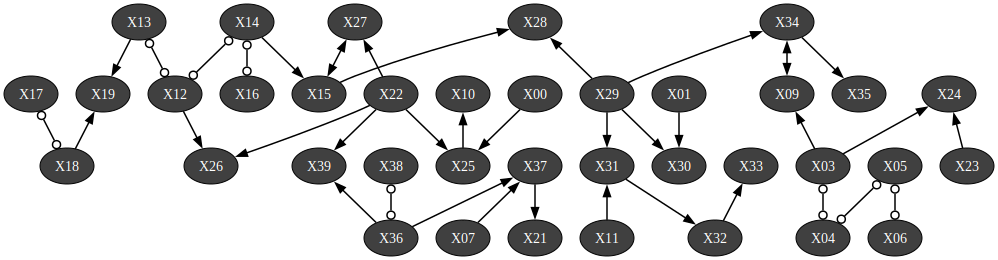

### Causal differences

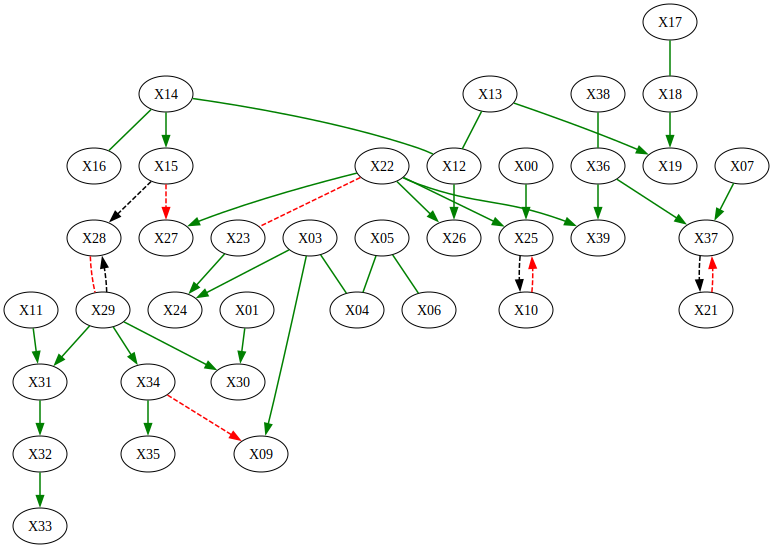

CPU times: user 3min 26s, sys: 5.79 s, total: 3min 32s
Wall time: 32.2 s
CPU times: user 2min 38s, sys: 6.29 s, total: 2min 45s
Wall time: 27.4 s


## Results of the data/bn-40n-40a-1-test6.csv

### Markov equivalence class (PAG)

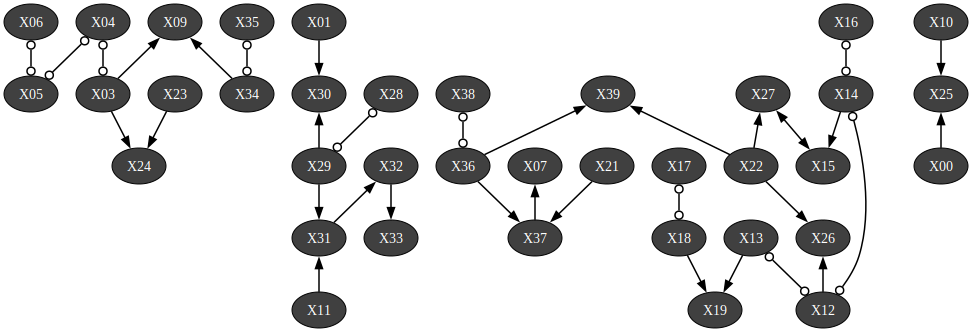

### Causal differences

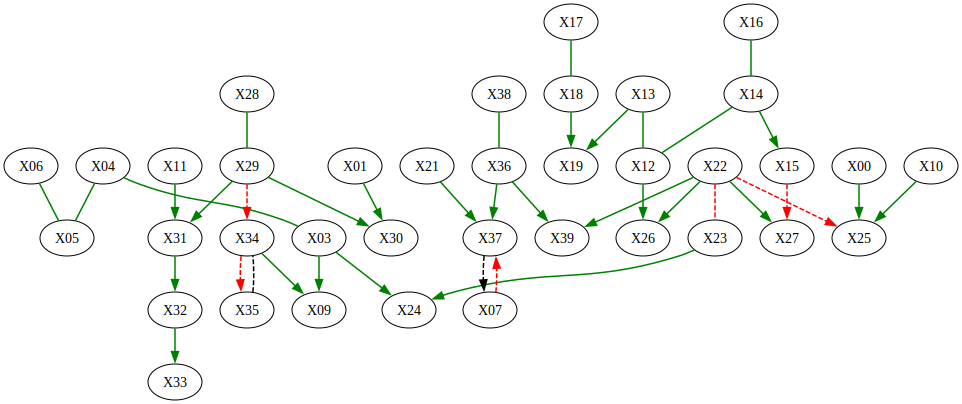

CPU times: user 3min 13s, sys: 5.58 s, total: 3min 19s
Wall time: 28.7 s
CPU times: user 2min 6s, sys: 4.62 s, total: 2min 11s
Wall time: 19.3 s


## Results of the data/bn-40n-40a-1-test8.csv

### Markov equivalence class (PAG)

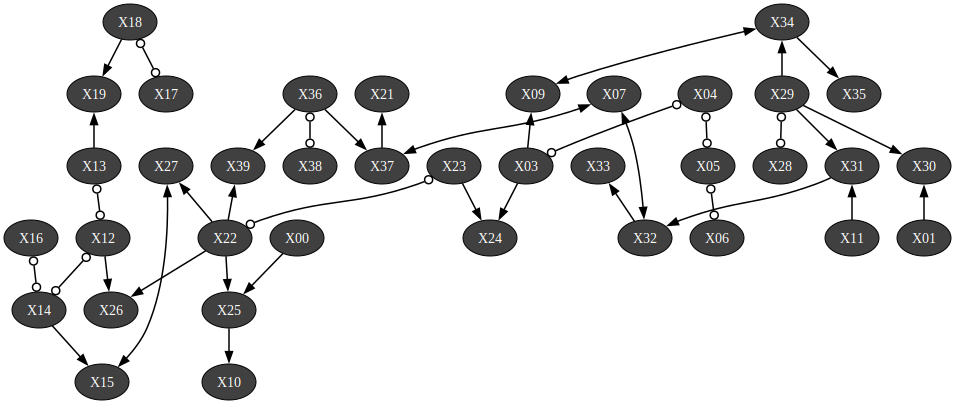

### Causal differences

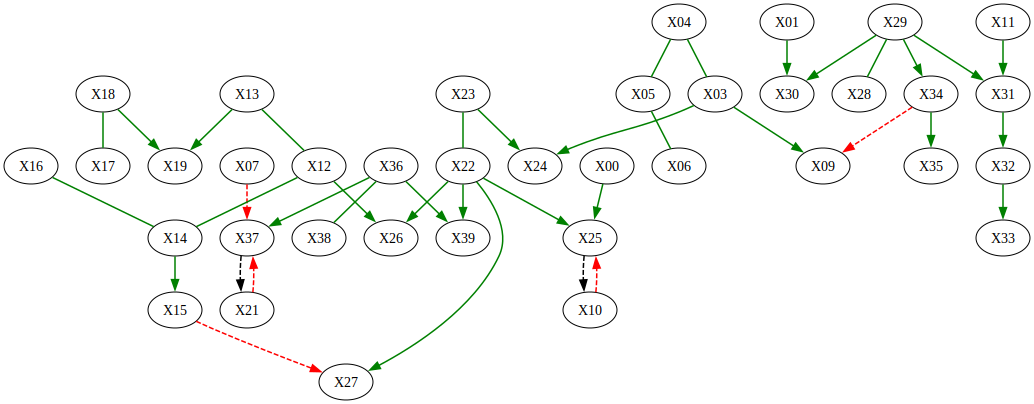

CPU times: user 3min 12s, sys: 5.05 s, total: 3min 17s
Wall time: 21.7 s
CPU times: user 43min 35s, sys: 2min 56s, total: 46min 31s
Wall time: 6min 58s


## Results of the data/bn-40n-40a-1-test9.csv

### Markov equivalence class (PAG)

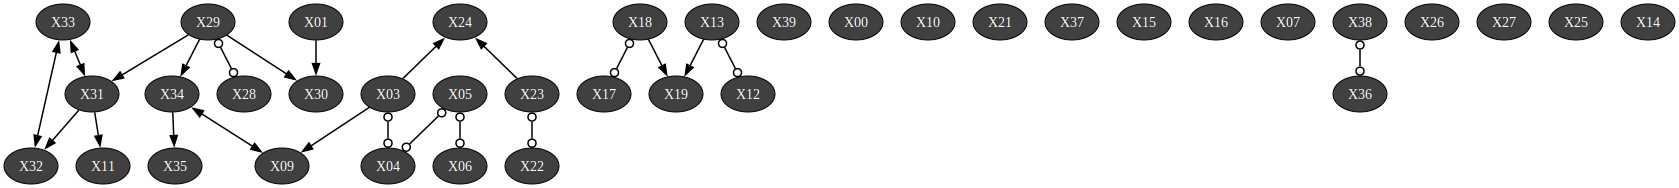

### Causal differences

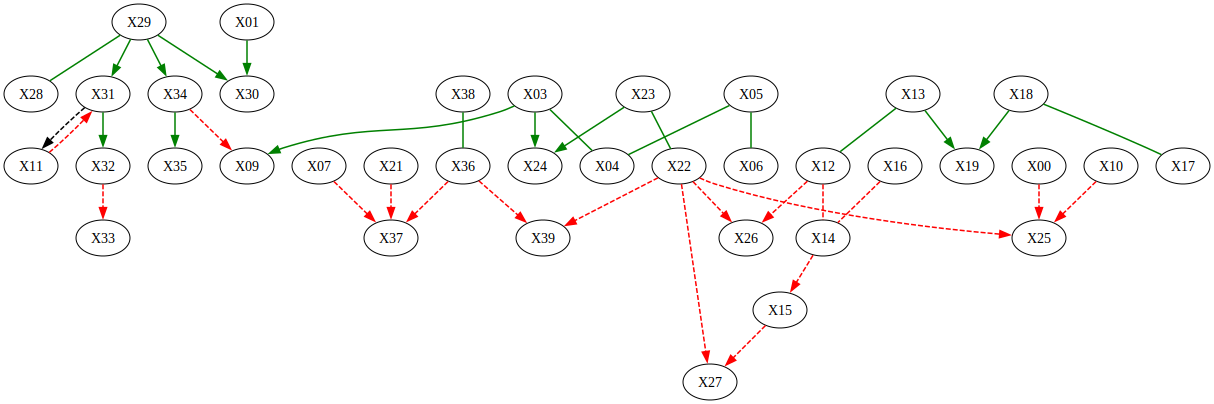

In [9]:
from pathlib import Path

for name in Path("data/").glob("bn-40n-40a-1-test*"):
    df = pd.read_csv(name)
    df = df.drop(["X02", "X20", "X08"], axis=1)

    learner = gum.BNLearner(df)
    learner.useMIIC()
    
    %time gumPDAG = learner.learnPDAG()
    %time pag, _ = fci(learner, ruleVerbose=False)

    display(
        Markdown(f"## Results of the {name}"),
        Markdown("### Markov equivalence class (PAG)"),
        toDot(pag),
        Markdown("### Causal differences"),
        showCausalDifferences(pag, gumPDAG, learner.names())
    )